1\. Describe your dataset. Describe and explore your dataset in the initial section of your Report. What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.

Source: https://www.kaggle.com/robikscube/hourly-energy-consumption
PJM Hourly Energy Consumption Data
PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.

The hourly power consumption data comes from PJM's website and are in megawatts (MW).

The regions have changed over the years so data may only appear for certain dates per region.

PJM Interconnection is a regional transmission organization (RTO) that coordinates the movement of wholesale
electricity in all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina,
Ohio, Pennsylvania, Tennessee, Virginia, West Virginia and the District of Columbia.

![Data Image](hourly-energy-image.jpg)

## Summary Statistics:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
%matplotlib inline

AEP = pd.read_csv('hourly-energy-consumption/AEP_hourly.csv')
AEP.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


For each of the transmission areas / associated power companies, the data was the same as above. Each region's energy comsumption was provided in a csv file and contained the power(Megawatts) on the grid at one hour intervals. 

In [2]:
DOM = pd.read_csv('hourly-energy-consumption/DOM_hourly.csv')
EKPC = pd.read_csv('hourly-energy-consumption/EKPC_hourly.csv')
DAYTON = pd.read_csv('hourly-energy-consumption/DAYTON_hourly.csv')
FE = pd.read_csv('hourly-energy-consumption/FE_hourly.csv')
COMED = pd.read_csv('hourly-energy-consumption/COMED_hourly.csv')

In [8]:
DOM_mean = DOM.DOM_MW.mean()
print(DOM_mean)

10949.203625128024


In [15]:
FE['Datetime'] = pd.to_datetime(FE.Datetime)
DOM['Datetime'] = pd.to_datetime(DOM.Datetime)
EKPC['Datetime'] = pd.to_datetime(EKPC.Datetime)
DAYTON['Datetime'] = pd.to_datetime(DAYTON.Datetime)
COMED['Datetime'] = pd.to_datetime(COMED.Datetime)
AEP['Datetime'] = pd.to_datetime(AEP.Datetime)

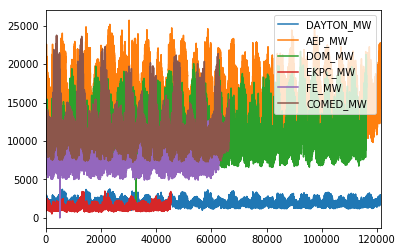

In [14]:
DAYTON.DAYTON_MW.plot(x = 'Datetime', y ='WpM')
AEP.AEP_MW.plot(x = 'Datetime', y ='WpM')
DOM.DOM_MW.plot(x = 'Datetime', y ='WpM')
EKPC.EKPC_MW.plot(x = 'Datetime', y ='WpM')
FE.FE_MW.plot(x = 'Datetime', y ='WpM')
COMED.COMED_MW.plot(x = 'Datetime', y ='WpM')
pyplot.legend(loc='upper right')

2\.Ask and answer analytic questions. Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

### Question 1: Customers vs. Average Load

My first question comes from an intuition of how grid-loads function. Since the grid must always be balanced against the current electricity demand, the total size and number of customers on each of the grids will affect load significantly. 

#### Initial Question:

How does the number of customers effect average grid load?

#### Additional Data Gathered:


## AEP
Ohio: 1.5 million customers
https://www.aepohio.com/info/facts/

Kentucky : 175,000
https://www.kentuckypower.com/info/facts/

Indiana + Michigan: 593,923
https://www.indianamichiganpower.com/info/facts/Facts.aspx

West Virginia, Virginia and Tennessee: 1 million
https://www.appalachianpower.com/info/facts/

Total: about 3.3 million 

## Dominion

Virginia and North Carolina : 2.5 million 
https://www.dominionenergy.com/about-us/moving-energy

## Dayton Power and Light Company

Miami valley OH : 520,000
https://www.dpandl.com/about-dpl/who-we-are/the-basics/

## CommonWealth Edison 
Northern Illinois: 4 million or 70 percent of the state’s population.
https://www.comed.com/AboutUs/Pages/Default.aspx

## EKPC East Kentucky Power Cooperative
Kentucky: 1.1 million 
http://www.ekpc.coop/factsandfigures.html

In [28]:
COMED['Watts'] = COMED.COMED_MW *1E6
COMED['WpM'] = COMED.Watts / 4E6
display(COMED.describe())

AEP['Watts'] = AEP.AEP_MW *1E6
AEP['WpM'] = AEP.Watts / 3.2E6
display(AEP.describe())

DAYTON['Watts'] = DAYTON.DAYTON_MW *1E6
DAYTON['WpM'] = DAYTON.Watts / 520000
display(DAYTON.describe())

DOM['Watts'] = DOM.DOM_MW *1E6
DOM['WpM'] = DOM.Watts / 2.5E6
display(DOM.describe())

EKPC['Watts'] = EKPC.EKPC_MW *1E6
EKPC['WpM'] = EKPC.Watts / 1.1E6
display(EKPC.describe())

,COMED_MW,Watts,WpM
count,66497.000000,6.649700e+04,66497.000000
mean,11420.152112,1.142015e+10,2855.038028
std,2304.139517,2.304140e+09,576.034879
min,7237.000000,7.237000e+09,1809.250000
25%,9780.000000,9.780000e+09,2445.000000
50%,11152.000000,1.115200e+10,2788.000000
75%,12510.000000,1.251000e+10,3127.500000
max,23753.000000,2.375300e+10,5938.250000


,AEP_MW,Watts,WpM
count,121273.000000,1.212730e+05,121273.000000
mean,15499.513717,1.549951e+10,4843.598037
std,2591.399065,2.591399e+09,809.812208
min,9581.000000,9.581000e+09,2994.062500
25%,13630.000000,1.363000e+10,4259.375000
50%,15310.000000,1.531000e+10,4784.375000
75%,17200.000000,1.720000e+10,5375.000000
max,25695.000000,2.569500e+10,8029.687500


,DAYTON_MW,Watts,WpM
count,121275.000000,1.212750e+05,121275.000000
mean,2037.851140,2.037851e+09,3918.944500
std,393.403153,3.934032e+08,756.544525
min,982.000000,9.820000e+08,1888.461538
25%,1749.000000,1.749000e+09,3363.461538
50%,2009.000000,2.009000e+09,3863.461538
75%,2279.000000,2.279000e+09,4382.692308
max,3746.000000,3.746000e+09,7203.846154


,DOM_MW,Watts,WpM
count,116189.000000,1.161890e+05,116189.000000
mean,10949.203625,1.094920e+10,4379.681450
std,2413.946569,2.413947e+09,965.578628
min,1253.000000,1.253000e+09,501.200000
25%,9322.000000,9.322000e+09,3728.800000
50%,10501.000000,1.050100e+10,4200.400000
75%,12378.000000,1.237800e+10,4951.200000
max,21651.000000,2.165100e+10,8660.400000


,EKPC_MW,Watts,WpM
count,45334.000000,4.533400e+04,45334.000000
mean,1464.218423,1.464218e+09,1331.107658
std,378.868404,3.788684e+08,344.425821
min,514.000000,5.140000e+08,467.272727
25%,1185.000000,1.185000e+09,1077.272727
50%,1386.000000,1.386000e+09,1260.000000
75%,1699.000000,1.699000e+09,1544.545455
max,3490.000000,3.490000e+09,3172.727273


In [30]:
COMED_mean = COMED.WpM.mean()
AEP_mean = AEP.WpM.mean()
DAYTON_mean = DAYTON.WpM.mean()
DOM_mean = DOM.WpM.mean()
EKPC_mean = EKPC.WpM.mean()

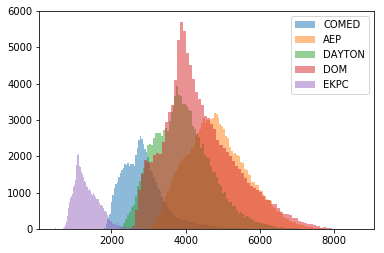

In [38]:
bins = 100
pyplot.hist(COMED.WpM, bins, alpha=0.5, label='COMED',)
pyplot.hist(AEP.WpM, bins, alpha=0.5, label='AEP',)
pyplot.hist(DAYTON.WpM, bins, alpha=0.5, label='DAYTON',)
pyplot.hist(DOM.WpM, bins, alpha=0.5, label='DOM',)
pyplot.hist(EKPC.WpM, bins, alpha=0.5, label='EKPC',)
pyplot.legend(loc='upper right')
pyplot.show()

The above histogram looks at load per customer for each provider. 

## Question 2: Latitude vs. Energy Consumption



In [25]:
## Northern Providers:
display(FE.describe(), COMED.describe())
print("HI")

,FE_MW
count,62874.000000
mean,7792.159064
std,1331.268006
min,0.000000
25%,6807.000000
50%,7700.000000
75%,8556.000000
max,14032.000000


,COMED_MW
count,66497.000000
mean,11420.152112
std,2304.139517
min,7237.000000
25%,9780.000000
50%,11152.000000
75%,12510.000000
max,23753.000000


HI


In [26]:
## Mid-Lat Providers:
display( AEP.describe(), DAYTON.describe())

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


,DAYTON_MW
count,121275.000000
mean,2037.851140
std,393.403153
min,982.000000
25%,1749.000000
50%,2009.000000
75%,2279.000000
max,3746.000000


In [24]:
## Southern Providers:
display( DOM.describe(), EKPC.describe())

,DOM_MW
count,116189.000000
mean,10949.203625
std,2413.946569
min,1253.000000
25%,9322.000000
50%,10501.000000
75%,12378.000000
max,21651.000000


,EKPC_MW
count,45334.000000
mean,1464.218423
std,378.868404
min,514.000000
25%,1185.000000
50%,1386.000000
75%,1699.000000
max,3490.000000


## Question 3: Winter Load vs. Summer Load

#### Initial Question:
How much does winter affect the average load?

In [65]:
DOM['Month'] = DOM.Datetime.dt.month
Jan = DOM['Month'] == 1
DOM_jan = DOM[Jan]
#DOM_dec.describe()
Jun = DOM['Month'] == 5
DOM_jun = DOM[Jun]
#DOM_jun.describe()


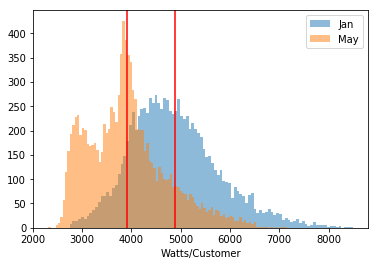

In [66]:
bins = 100

pyplot.hist(DOM_jan.WpM, bins, alpha=0.5, label='Jan',)
mean = DOM_jan.WpM.mean()
pyplot.axvline(mean, color='r')

pyplot.hist(DOM_jun.WpM, bins, alpha=0.5, label='May')
mean2 = DOM_jun.WpM.mean()
pyplot.axvline(mean2, color='r')
pyplot.legend(loc='upper right')
pyplot.xlabel("Watts/Customer")
pyplot.show()

In [67]:
EKPC['Month'] = EKPC.Datetime.dt.month
Jan = EKPC['Month'] == 1
EKPC_jan = EKPC[Jan]
#DOM_dec.describe()
Jun = EKPC['Month'] == 5
EKPC_jun = EKPC[Jun]

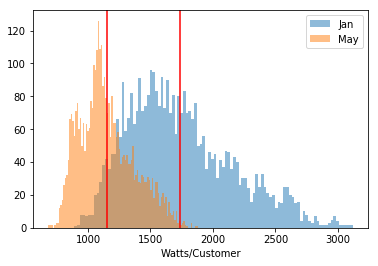

In [69]:
bins = 100

pyplot.hist(EKPC_jan.WpM, bins, alpha=0.5, label='Jan',)
mean = EKPC_jan.WpM.mean()
pyplot.axvline(mean, color='r')

pyplot.hist(EKPC_jun.WpM, bins, alpha=0.5, label='May')
mean2 = EKPC_jun.WpM.mean()
pyplot.axvline(mean2, color='r')
pyplot.legend(loc='upper right')
pyplot.xlabel("Watts/Customer")
pyplot.show()

3\.Propose further research. Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.

In the end, the questions I aimed to answer all tie into the same question. Ultimately, it would be nice to combine the three into one result. The result would provide insight into how each grid compares in terms of efficiency and consistency throughout the year. 

To gain further insight into how these grids compare, I'd like to incorporate information such as: 1\. the amount of renewable energy vs fossil fuel is being generated 2\. the cost of energy per region 3\. significant weather events 4\. and how each grid is "connected" in terms of energy balancing. 